In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from matplotlib.colors import ListedColormap

import seaborn as sns

In [3]:
data = pd.read_csv("pulsar_stars.csv")
data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [4]:
data_2 = np.array(data)
data_3 = data_2[:, [2,4,5,6,7]]        #feature selection using backward elimination
y = np.array(data['target_class'])

In [5]:
scaler = MinMaxScaler()     

In [6]:
x = scaler.fit_transform(data_3)  

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 7823)

In [8]:
xtrain.shape

(13423, 5)

In [9]:
regressor = LogisticRegression()

In [10]:
regressor.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
y_pred = regressor.predict(xtest)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
cm = confusion_matrix(ytest, y_pred)

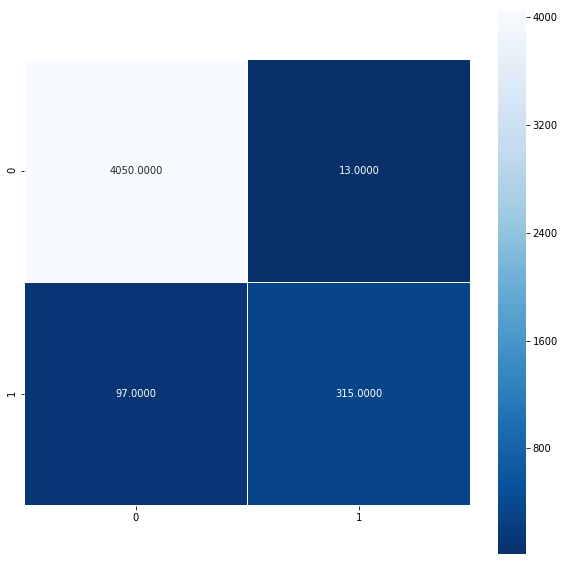

In [13]:
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True, fmt = '.4f', linewidths = .5, square = True, cmap = 'Blues_r')

In [14]:
from sklearn.metrics import accuracy_score           
print(accuracy_score(ytest, y_pred))

0.9754189944134078


In [15]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4063
          1       0.96      0.76      0.85       412

avg / total       0.98      0.98      0.97      4475

